In [7]:
!pip install pymysql > /dev/null #mysql 설치

# mysql.json 파일 업로드
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# json 파일 읽기
import json
with open(filename) as fp:
  config_str = fp.read()
config = json.loads(config_str)

# mysql 로그인 및 접속
import pymysql 
conn = pymysql.connect( 
    host = config['host'], 
    user = config['user'], 
    password = config['password'], 
    database = config['database'], 
    port = config['port'] 
  )

Saving mysql.json to mysql.json


In [9]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시시작
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [21]:
from datetime import datetime 

In [ ]:
cur = conn.cursor()
sql_select = """
  select * from products;
"""
cur.execute(sql_select)
products_list = cur.fetchall()
products_list

In [ ]:
cur = conn.cursor()
sql_select = """
  select * from sales;
"""
cur.execute(sql_select)
sales_list = cur.fetchall()
sales_list

In [73]:
products_list = pd.DataFrame(products_list, columns=['pid', 'pname', 'pprice', 'pcategory', 'pcost']).set_index('pid')
products_list

,pname,pprice,pcategory,pcost
pid,,,,
10001,청바지1,60911,bottom,24364
10002,흑청바지1,71482,bottom,21445
10003,중청바지1,76300,bottom,24416
10004,면바지1,51911,bottom,17650
10005,스커트1,60560,bottom,21802
...,...,...,...,...
10086,운동화6,49078,shoes,11779
10087,러닝화6,53248,shoes,19169
10088,구두6,45791,shoes,15111


In [74]:
pl_1 = products_list

In [75]:
sales_list = pd.DataFrame(sales_list, columns=['sid', 'sdate', 'scompany', 'spid', 'sunit']).set_index('sid')
sales_list.rename(columns = {'spid':'pid'}, inplace=True)
sales_list

,sdate,scompany,pid,sunit
sid,,,,
101,2020-01-15,musinsa,10078,452
102,2020-01-11,abc-mart,10067,466
103,2020-01-03,folder,10032,259
104,2020-01-06,lotte,10015,116
105,2020-01-03,hyundai,10013,463
...,...,...,...,...
256,2020-12-01,musinsa,10041,153
257,2020-12-17,abc-mart,10045,253
258,2020-12-03,folder,10070,396


In [76]:
sl_1 = sales_list

In [77]:
sl_1['mdate'] = pd.to_datetime(sl_1['sdate'])

In [78]:
sl_1

,sdate,scompany,pid,sunit,mdate
sid,,,,,
101,2020-01-15,musinsa,10078,452,2020-01-15
102,2020-01-11,abc-mart,10067,466,2020-01-11
103,2020-01-03,folder,10032,259,2020-01-03
104,2020-01-06,lotte,10015,116,2020-01-06
105,2020-01-03,hyundai,10013,463,2020-01-03
...,...,...,...,...,...
256,2020-12-01,musinsa,10041,153,2020-12-01
257,2020-12-17,abc-mart,10045,253,2020-12-17
258,2020-12-03,folder,10070,396,2020-12-03


In [79]:
sl_1['month'] = sl_1['mdate'].dt.month
sl_1

,sdate,scompany,pid,sunit,mdate,month
sid,,,,,,
101,2020-01-15,musinsa,10078,452,2020-01-15,1
102,2020-01-11,abc-mart,10067,466,2020-01-11,1
103,2020-01-03,folder,10032,259,2020-01-03,1
104,2020-01-06,lotte,10015,116,2020-01-06,1
105,2020-01-03,hyundai,10013,463,2020-01-03,1
...,...,...,...,...,...,...
256,2020-12-01,musinsa,10041,153,2020-12-01,12
257,2020-12-17,abc-mart,10045,253,2020-12-17,12
258,2020-12-03,folder,10070,396,2020-12-03,12


In [84]:
total_list = pd.merge(sl_1, products_list, how='left', on='pid')
total_list

,sdate,scompany,pid,sunit,mdate,month,pname,pprice,pcategory,pcost
0,2020-01-15,musinsa,10078,452,2020-01-15,1,중청바지6,71136,bottom,27743
1,2020-01-11,abc-mart,10067,466,2020-01-11,1,긴팔티5,92159,top,34099
2,2020-01-03,folder,10032,259,2020-01-03,1,흑청바지3,91512,bottom,19218
3,2020-01-06,lotte,10015,116,2020-01-06,1,슬리퍼1,58512,shoes,20479
4,2020-01-03,hyundai,10013,463,2020-01-03,1,구두1,70148,shoes,18238
...,...,...,...,...,...,...,...,...,...,...
155,2020-12-01,musinsa,10041,153,2020-12-01,12,운동화3,45904,shoes,17444
156,2020-12-17,abc-mart,10045,253,2020-12-17,12,슬리퍼3,75752,shoes,23483
157,2020-12-03,folder,10070,396,2020-12-03,12,셔츠5,74847,top,18712
158,2020-12-27,lotte,10035,379,2020-12-27,12,스커트3,96005,bottom,35522


In [93]:
total_list2 = total_list
total_list2

,sdate,scompany,pid,sunit,mdate,month,pname,pprice,pcategory,pcost
0,2020-01-15,musinsa,10078,452,2020-01-15,1,중청바지6,71136,bottom,27743
1,2020-01-11,abc-mart,10067,466,2020-01-11,1,긴팔티5,92159,top,34099
2,2020-01-03,folder,10032,259,2020-01-03,1,흑청바지3,91512,bottom,19218
3,2020-01-06,lotte,10015,116,2020-01-06,1,슬리퍼1,58512,shoes,20479
4,2020-01-03,hyundai,10013,463,2020-01-03,1,구두1,70148,shoes,18238
...,...,...,...,...,...,...,...,...,...,...
155,2020-12-01,musinsa,10041,153,2020-12-01,12,운동화3,45904,shoes,17444
156,2020-12-17,abc-mart,10045,253,2020-12-17,12,슬리퍼3,75752,shoes,23483
157,2020-12-03,folder,10070,396,2020-12-03,12,셔츠5,74847,top,18712
158,2020-12-27,lotte,10035,379,2020-12-27,12,스커트3,96005,bottom,35522


In [94]:
total_list2['총매출'] = total_list2['pprice'] * total_list2['sunit']
total_list2['총비용'] = total_list2['pcost'] * total_list2['sunit']
total_list2['순이익'] = total_list2['총매출'] - total_list2['총비용']
total_list2

,sdate,scompany,pid,sunit,mdate,month,pname,pprice,pcategory,pcost,총매출,총비용,순이익
0,2020-01-15,musinsa,10078,452,2020-01-15,1,중청바지6,71136,bottom,27743,32153472,12539836,19613636
1,2020-01-11,abc-mart,10067,466,2020-01-11,1,긴팔티5,92159,top,34099,42946094,15890134,27055960
2,2020-01-03,folder,10032,259,2020-01-03,1,흑청바지3,91512,bottom,19218,23701608,4977462,18724146
3,2020-01-06,lotte,10015,116,2020-01-06,1,슬리퍼1,58512,shoes,20479,6787392,2375564,4411828
4,2020-01-03,hyundai,10013,463,2020-01-03,1,구두1,70148,shoes,18238,32478524,8444194,24034330
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2020-12-01,musinsa,10041,153,2020-12-01,12,운동화3,45904,shoes,17444,7023312,2668932,4354380
156,2020-12-17,abc-mart,10045,253,2020-12-17,12,슬리퍼3,75752,shoes,23483,19165256,5941199,13224057
157,2020-12-03,folder,10070,396,2020-12-03,12,셔츠5,74847,top,18712,29639412,7409952,22229460
158,2020-12-27,lotte,10035,379,2020-12-27,12,스커트3,96005,bottom,35522,36385895,13462838,22923057


In [155]:
total_list2.groupby(['month']).sum()[['총매출', '순이익']]

,총매출,순이익
month,,
1,236635020,163298698
2,234460165,154872959
3,393576770,277614341
4,254733868,170336370
5,343026721,232975557
6,244864055,166516572
7,160694733,108818920
8,222781165,151901136
9,303717745,209696335


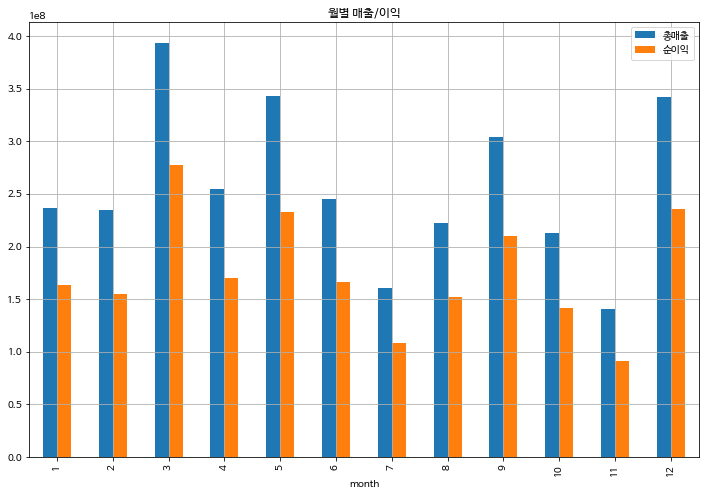

In [109]:
mpc_mc = total_list2.groupby(['month']).sum()[['총매출', '순이익']]
mpc_mc.plot(kind='bar', grid=True, figsize=(12,8))
plt.title('월별 매출/이익')
plt.show()

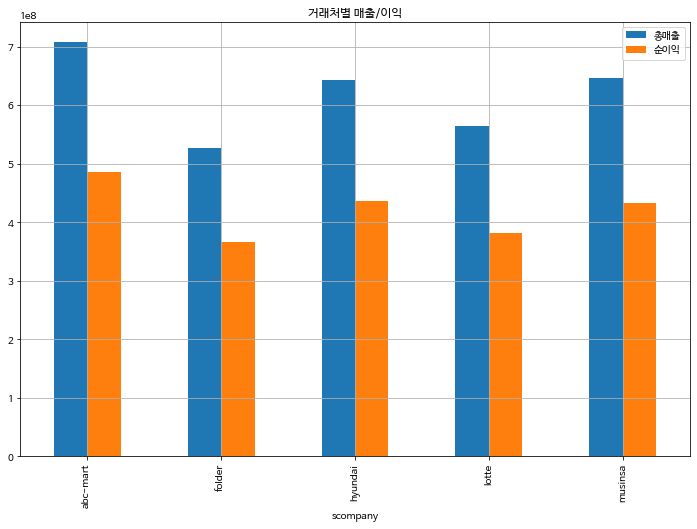

In [110]:
mpc_cp = total_list2.groupby(['scompany']).sum()[['총매출', '순이익']]
mpc_cp.plot(kind='bar', grid=True, figsize=(12,8))
plt.title('거래처별 매출/이익')
plt.show()

In [123]:
total_list2.groupby(['scompany', 'pname']).sum()[['sunit']]

sunit
scompany pname       
abc-mart 구두1      180
         구두2      285
         구두4      337
         긴팔티1     437
         긴팔티5     466
...               ...
musinsa  후드티4     341
         후드티5     441
         흑청바지2    259
         흑청바지4    585
         흑청바지5    308

[128 rows x 1 columns]

In [135]:
import seaborn as sns

In [141]:
total_list2.pivot_table('sunit', 'scompany', 'pname')

pname,구두1,구두2,구두4,구두5,구두6,긴팔티1,긴팔티2,긴팔티3,긴팔티4,긴팔티5,긴팔티6,러닝화1,러닝화3,러닝화4,러닝화5,러닝화6,맨투맨1,맨투맨2,맨투맨3,맨투맨4,맨투맨5,맨투맨6,면바지1,면바지2,면바지3,면바지6,반팔티1,반팔티2,반팔티4,반팔티5,반팔티6,부츠2,부츠3,부츠4,부츠6,셔츠1,셔츠2,셔츠5,셔츠6,스커트1,스커트2,스커트3,스커트5,스커트6,슬리퍼1,슬리퍼2,슬리퍼3,슬리퍼4,슬리퍼5,슬리퍼6,운동화1,운동화3,운동화4,운동화5,운동화6,중청바지1,중청바지2,중청바지3,중청바지4,중청바지6,청바지2,청바지3,청바지4,청바지5,청바지6,후드티1,후드티4,후드티5,흑청바지1,흑청바지2,흑청바지3,흑청바지4,흑청바지5,흑청바지6
scompany,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
abc-mart,180.0,285.0,337.0,NaN,NaN,437.0,NaN,NaN,NaN,466.0,164.0,NaN,470.0,238.0,408.0,NaN,410.000000,NaN,NaN,138.0,NaN,NaN,NaN,481.0,NaN,NaN,109.0,NaN,NaN,382.0,371.0,262.5,NaN,NaN,NaN,NaN,NaN,NaN,403.5,NaN,NaN,413.0,368.0,NaN,NaN,NaN,253.0,NaN,351.0,256.0,NaN,NaN,136.0,NaN,NaN,NaN,NaN,NaN,NaN,327.0,NaN,396.0,465.0,365.0,NaN,251.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,279.0
folder,NaN,NaN,NaN,NaN,168.0,NaN,203.0,163.0,NaN,446.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,320.5,NaN,145.0,268.5,163.0,NaN,NaN,NaN,386.0,NaN,NaN,NaN,349.0,NaN,NaN,374.5,119.0,NaN,NaN,440.0,NaN,NaN,452.0,NaN,NaN,NaN,225.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230.0,NaN,NaN,350.333333,NaN,365.0,261.0,NaN,NaN,NaN,NaN,NaN,225.0,NaN,NaN,259.0,NaN,NaN,317.0
hyundai,463.0,NaN,NaN,257.0,NaN,NaN,NaN,NaN,282.0,156.0,NaN,300.5,439.0,NaN,NaN,NaN,365.333333,NaN,NaN,232.0,NaN,NaN,NaN,132.0,357.333333,216.0,NaN,NaN,402.0,NaN,NaN,NaN,364.0,NaN,NaN,NaN,NaN,NaN,NaN,271.666667,NaN,277.0,327.0,NaN,NaN,NaN,NaN,420.0,NaN,NaN,261.0,479.0,NaN,NaN,460.5,NaN,NaN,NaN,483.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,454.0,NaN,NaN,NaN,NaN,NaN,NaN
lotte,NaN,284.0,NaN,NaN,NaN,NaN,NaN,NaN,264.0,NaN,NaN,333.0,265.0,NaN,119.0,356.000000,NaN,NaN,257.0,437.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153.0,NaN,NaN,NaN,NaN,434.0,NaN,121.0,260.0,152.0,NaN,NaN,NaN,NaN,379.0,NaN,NaN,116.0,334.0,NaN,NaN,NaN,416.0,152.0,192.5,415.0,207.0,257.0,NaN,NaN,NaN,128.000000,175.0,NaN,391.0,NaN,NaN,415.0,334.0,NaN,393.0,153.0,NaN,130.0,NaN,NaN,362.0
musinsa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,345.5,NaN,NaN,426.666667,NaN,294.0,NaN,NaN,249.0,NaN,119.0,NaN,NaN,NaN,NaN,NaN,333.0,NaN,NaN,457.0,NaN,307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,486.0,NaN,NaN,NaN,241.0,NaN,314.5,NaN,153.0,NaN,123.0,NaN,NaN,265.0,115.0,262.000000,454.0,NaN,NaN,NaN,384.0,437.0,NaN,341.0,441.0,NaN,259.0,NaN,292.5,308.0,NaN


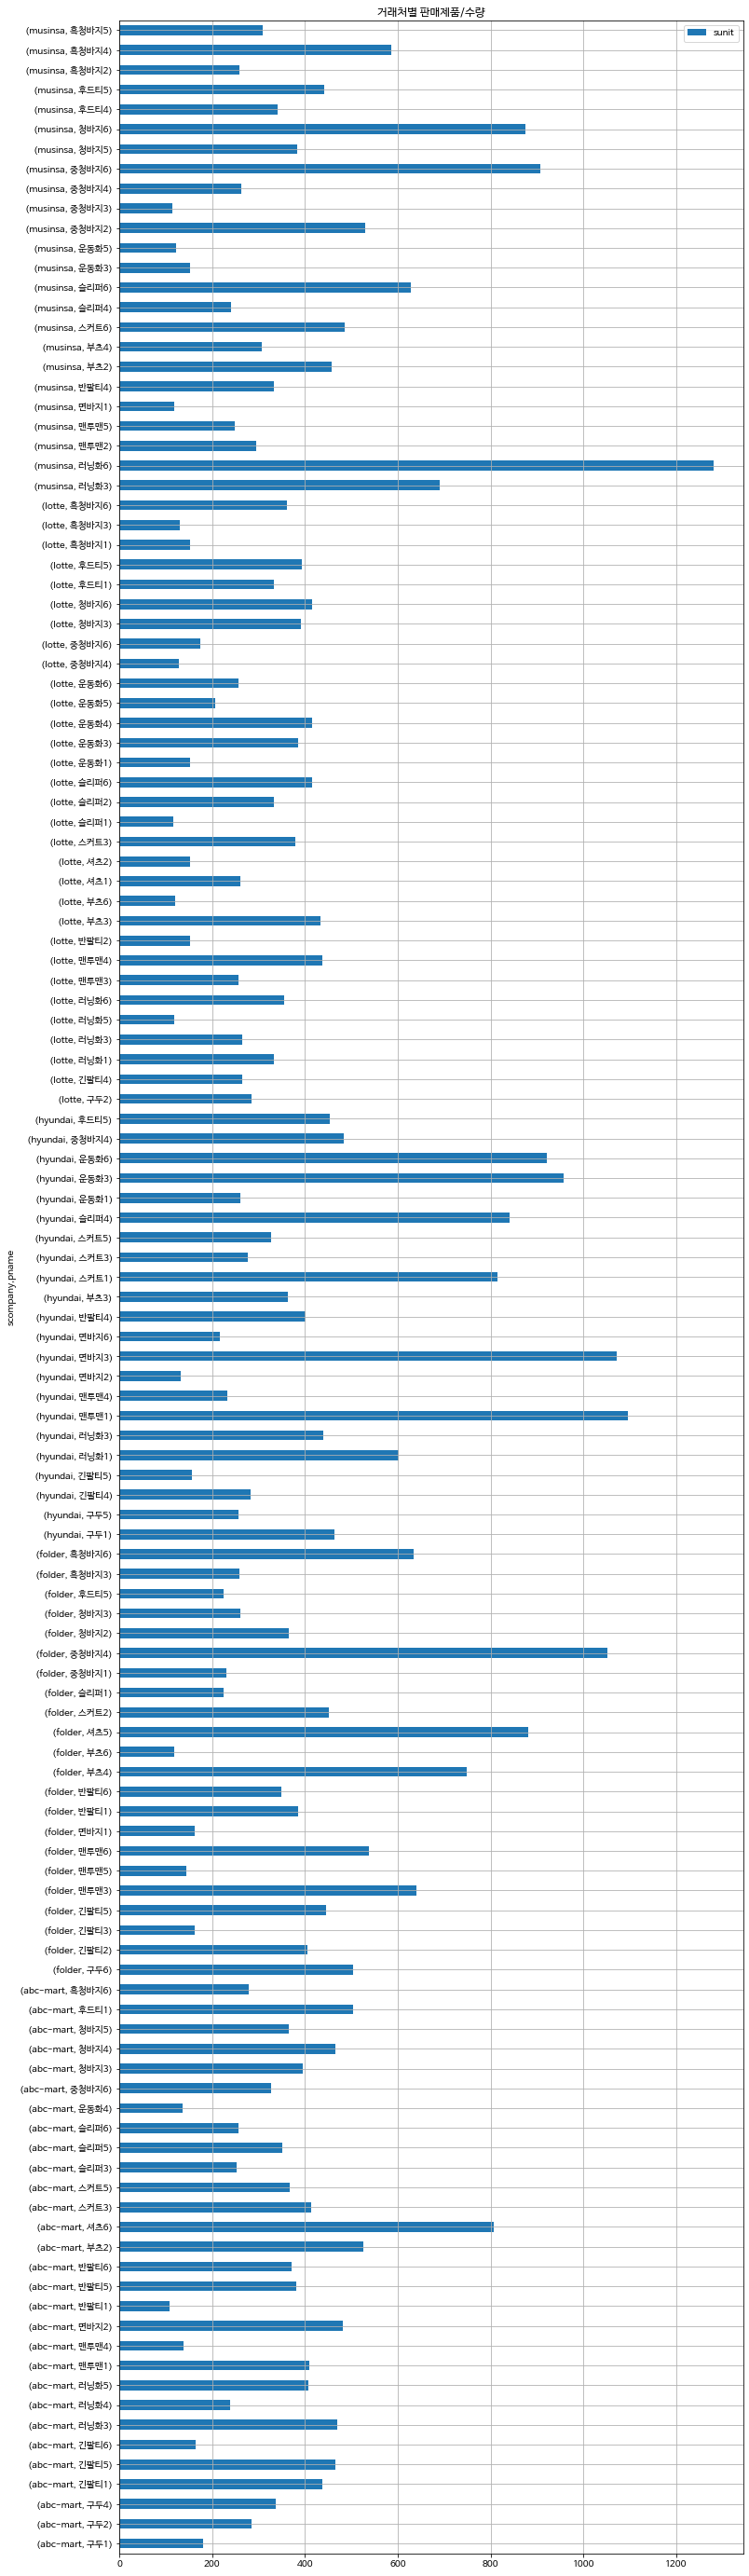

In [159]:
sps = total_list2.groupby(['scompany', 'pname']).sum()[['sunit']]
sps.plot(kind='barh', grid=True, figsize=(12,50))
plt.title('거래처별 판매제품/수량')
plt.show()

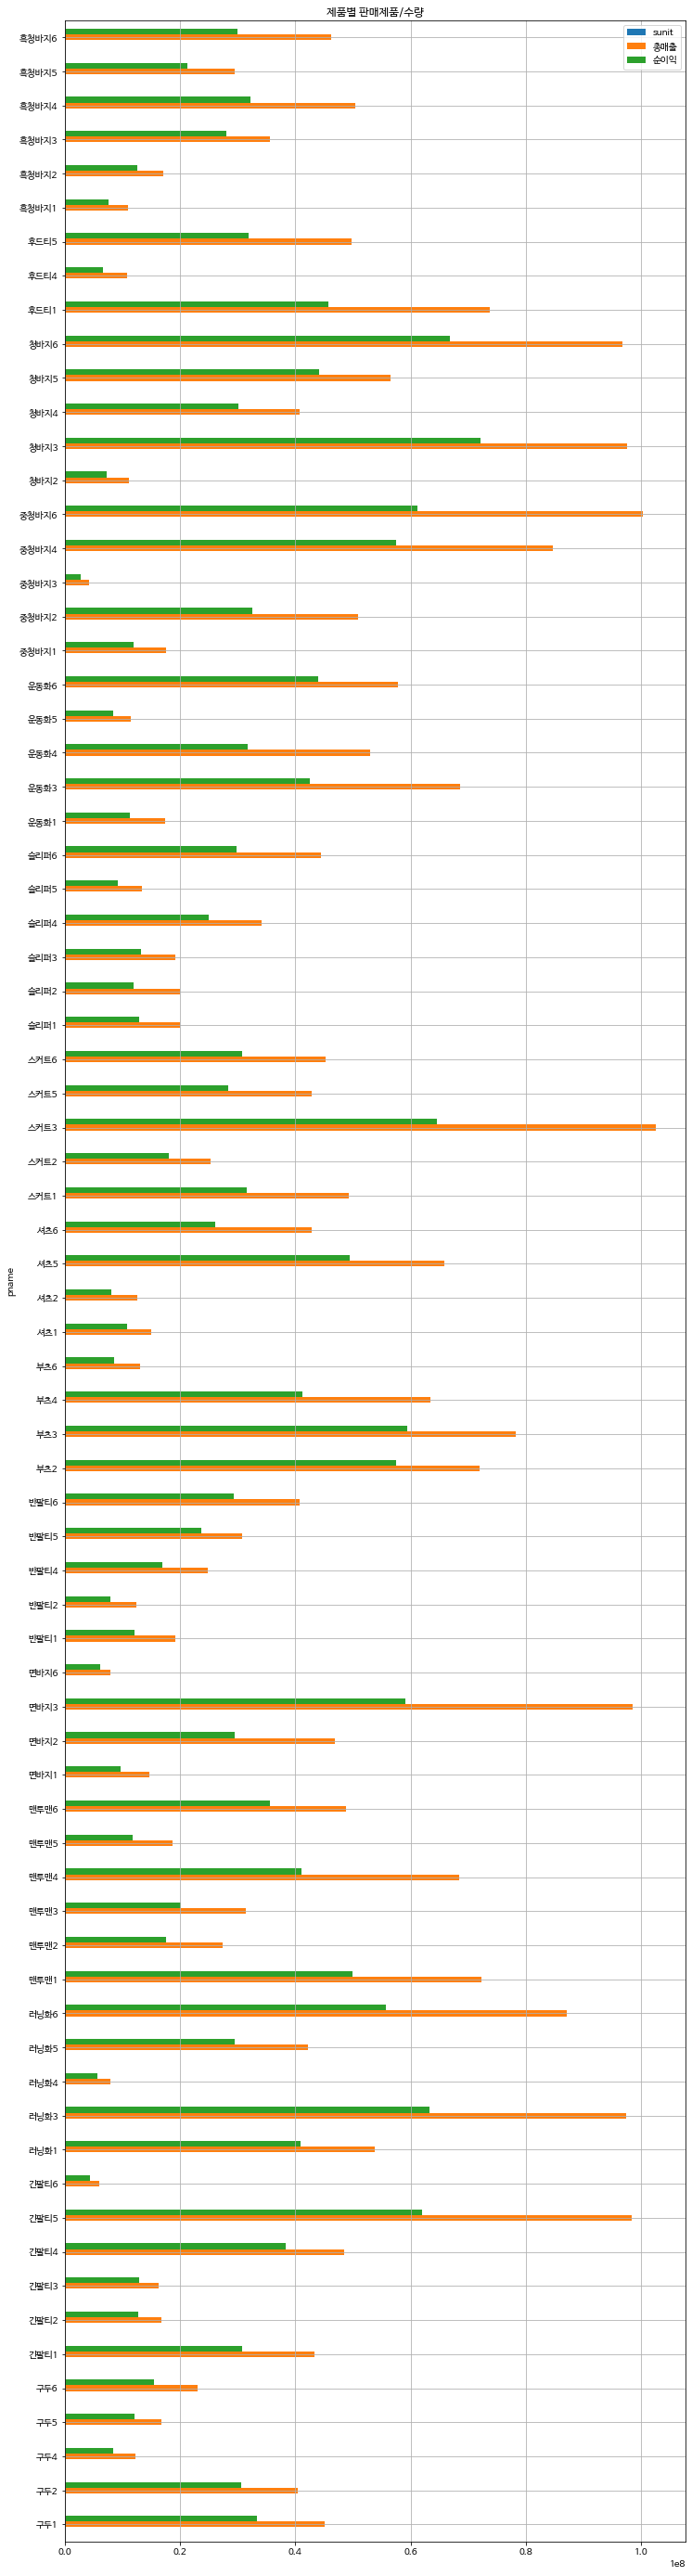

In [161]:
spc = total_list2.groupby(['pname']).sum()[['sunit','총매출', '순이익']]

spc.plot(kind='barh', grid=True, figsize=(12,50))
plt.title('제품별 판매제품/수량')
plt.show()

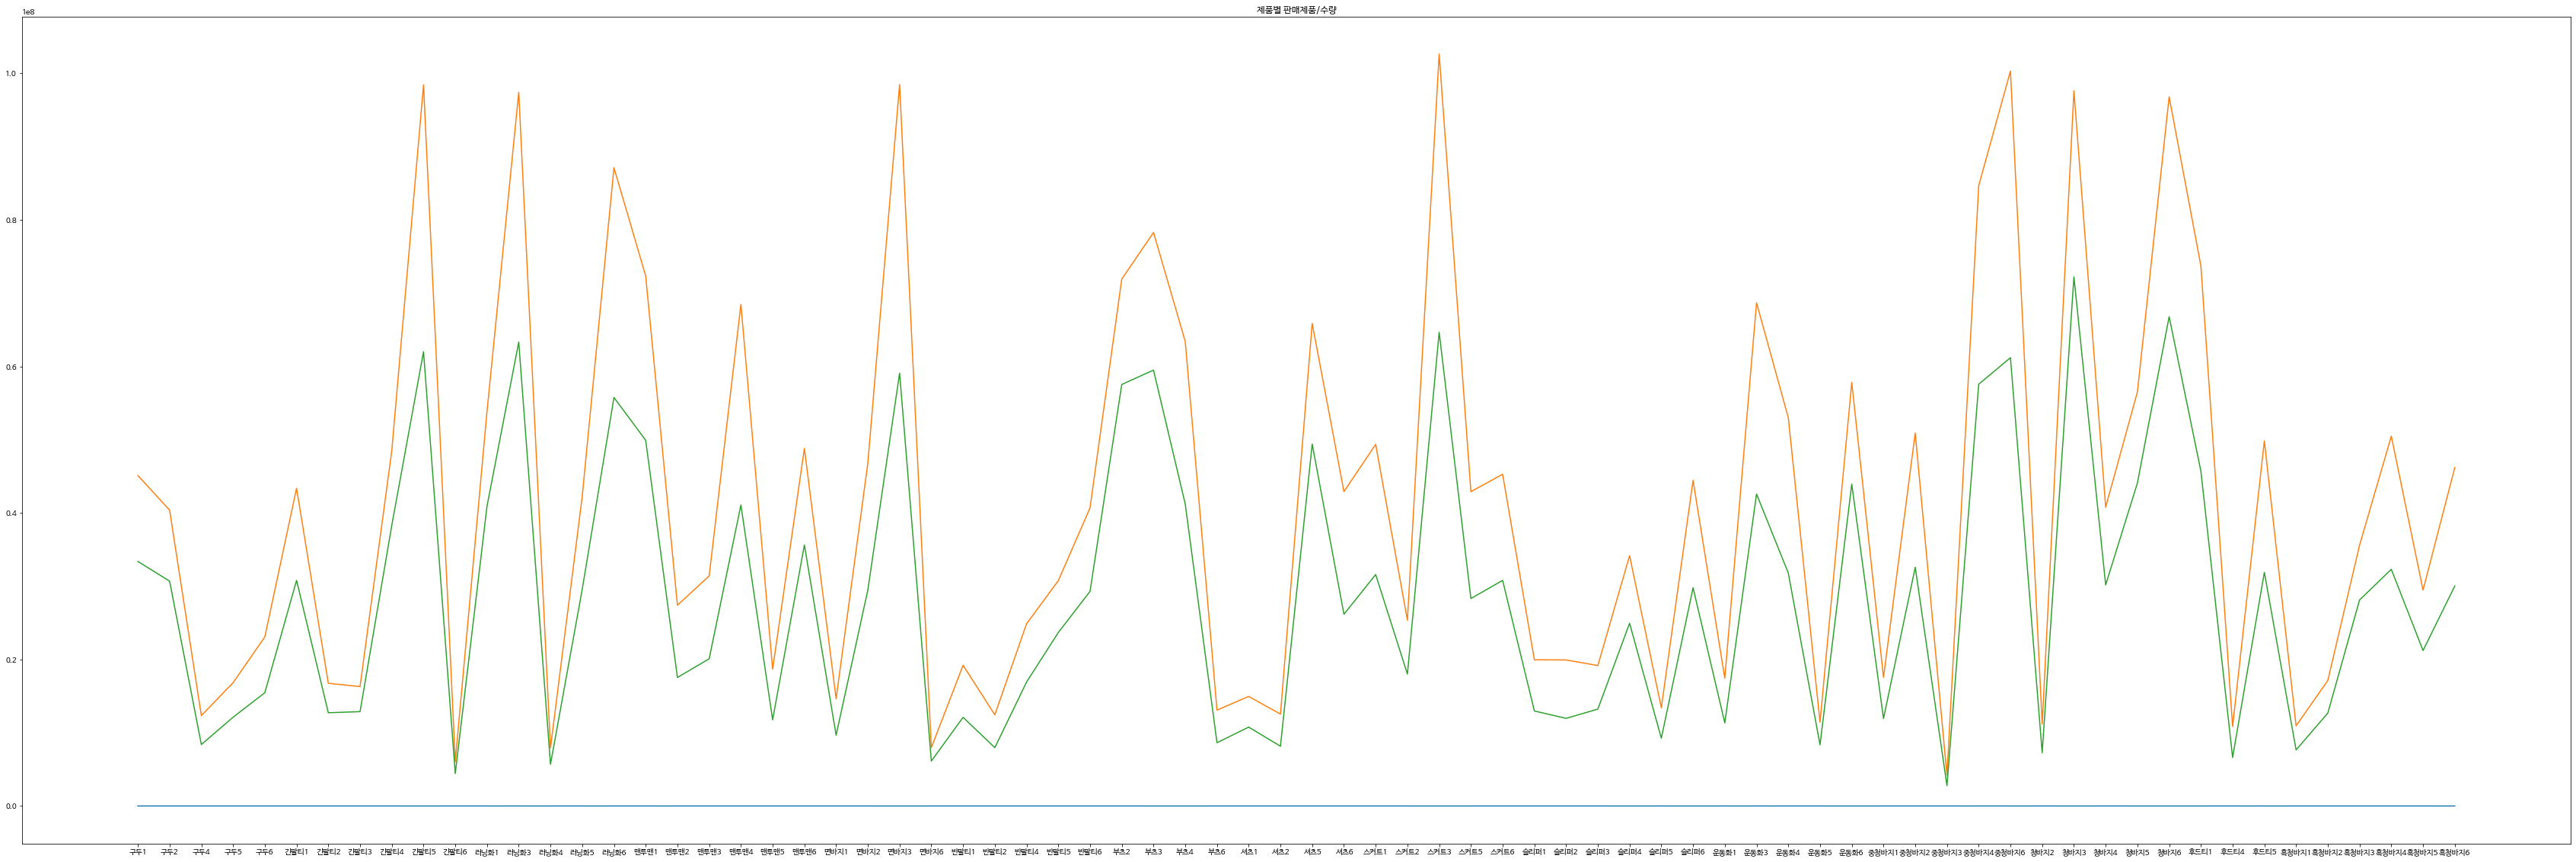

In [170]:
spc = total_list2.groupby(['pname']).sum()[['sunit','총매출', '순이익']]
plt.figure(figsize=(60,20))
plt.plot(spc.index, spc.sunit)
plt.plot(spc.index, spc.총매출)
plt.plot(spc.index, spc.순이익)
plt.title('제품별 판매제품/수량')
plt.show()

In [149]:
total_list2.columns

Index(['sdate', 'scompany', 'pid', 'sunit', 'mdate', 'month', 'pname',
       'pprice', 'pcategory', 'pcost', '총매출', '총비용', '순이익'],
      dtype='object')

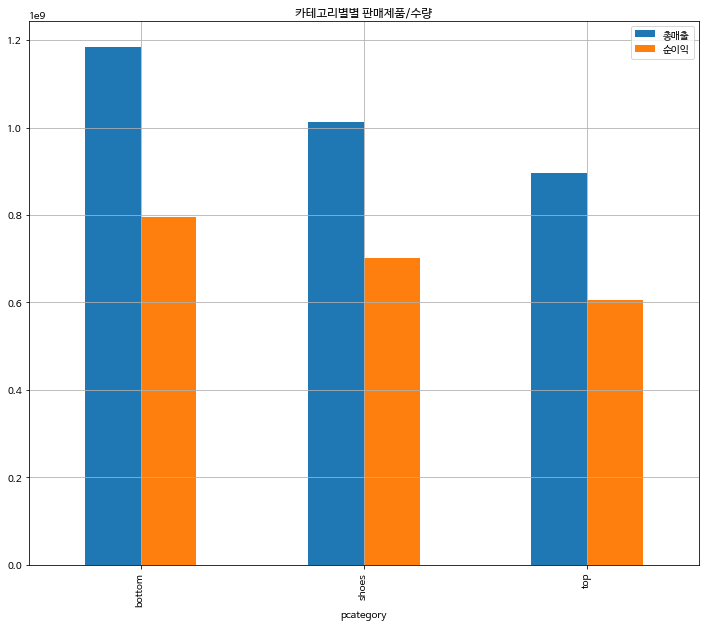

In [157]:
cpc = total_list2.groupby(['pcategory']).sum()[['총매출', '순이익']]
cpc.plot(kind='bar', grid=True, figsize=(12,10))
plt.title('카테고리별별 판매제품/수량')
plt.show()

In [158]:
cpc

,총매출,순이익
pcategory,,
bottom,1183669893,796280616
shoes,1012323572,702256789
top,895080237,605795435


In [171]:
cur.close()
conn.close()